<a href="https://colab.research.google.com/github/eidzokumakura/ml_start/blob/main/block234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

x = torch.tensor([[1., 2., 3., 4.,],
                  [5., 6., 7., 8.,],
                  [9.,10.,11.,12.,]], requires_grad=True)

#######
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

x = x.to(device)
#######

function = 10 * (x ** 2).sum()

function.backward()

print(x.grad, '<- gradient')

x.data -= 0.001 * x.grad

x.grad.zero_()

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <- gradient


tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

# Функции

In [ ]:
import torch
import numpy as np
x = torch.tensor([8., 8.], requires_grad=True)

optimizer = torch.optim.SGD([x], lr = 0.001)

def function_parabola(variable):
  return 10 * (variable ** 2).sum()

def function_skewed(variable):
  gramma = torch.tensor([[1., -1.], [1., 1.]]) @ torch.tensor([[1.0, 0.0], [0.0, 4.0]])
  res = 10 * (variable.unsqueeze(0) @ (gramma @ variable.unsqueeze(1))).sum()
  return res

def function_s

def make_gradient_step(function, variable):
  function_result = function(variable)
  function_result.backward()
  optimizer.step()
  optimizer.zero_grad()

for i in range(500):
  make_gradient_step(function_parabola, x)
print(x)



tensor([0.0003, 0.0003], requires_grad=True)


# Семинар: реализация градиентного спуска

In [ ]:
import torch

w = torch.tensor([[5., 10.],
                 [1., 2.]], requires_grad=True)

function =  torch.prod(torch.log(torch.log(w + 7)))
function.backward()

print(w.grad) # Код для самопроверки

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])


In [ ]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001

for _ in range(500):
    # critical: calculate the function inside the loop
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -=  alpha * w.grad
    w.grad.zero_()

print(w) # Код для самопроверки

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


# Семинар: строим первую нейронную сеть

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [ ]:
import torch

**Train dataset**


Text(0.5, 1.0, '$y = sin(x)$')

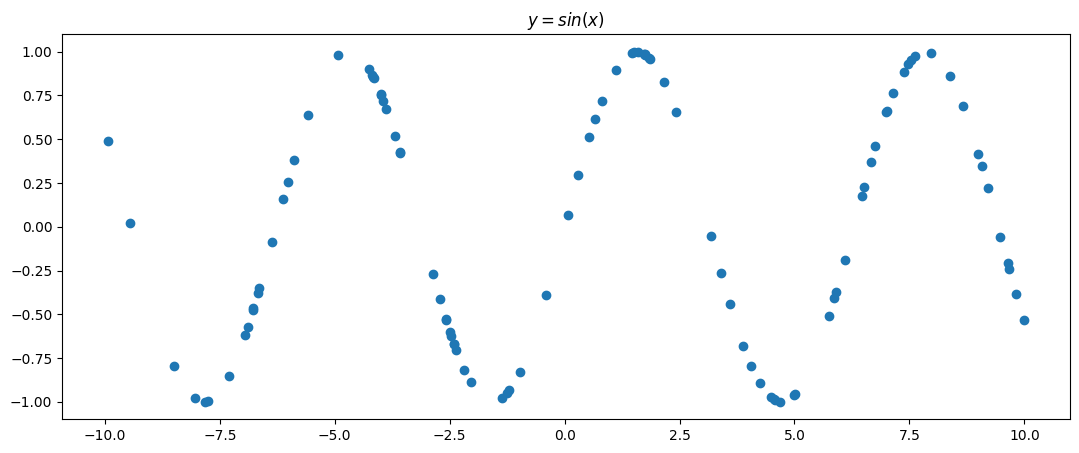

In [ ]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')

Text(0.5, 1.0, 'Gaussian noise')

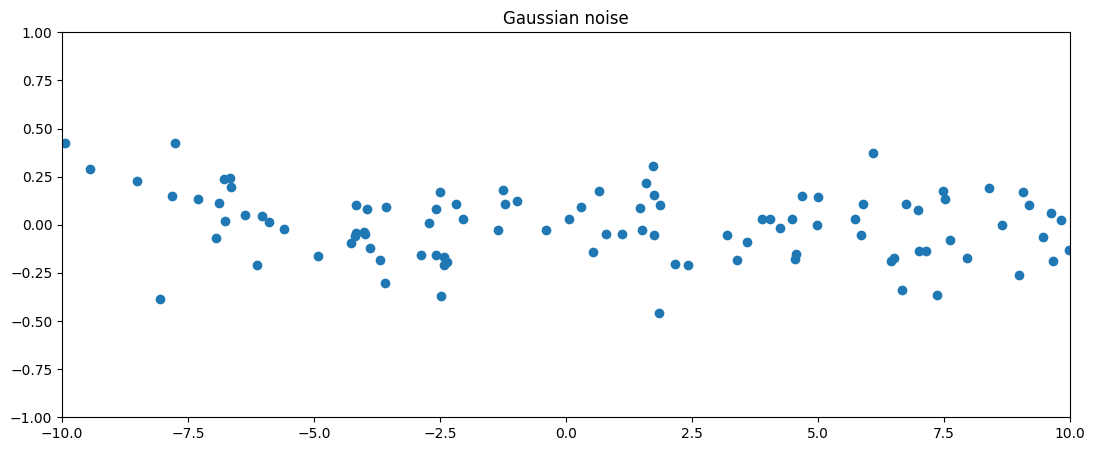

In [ ]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

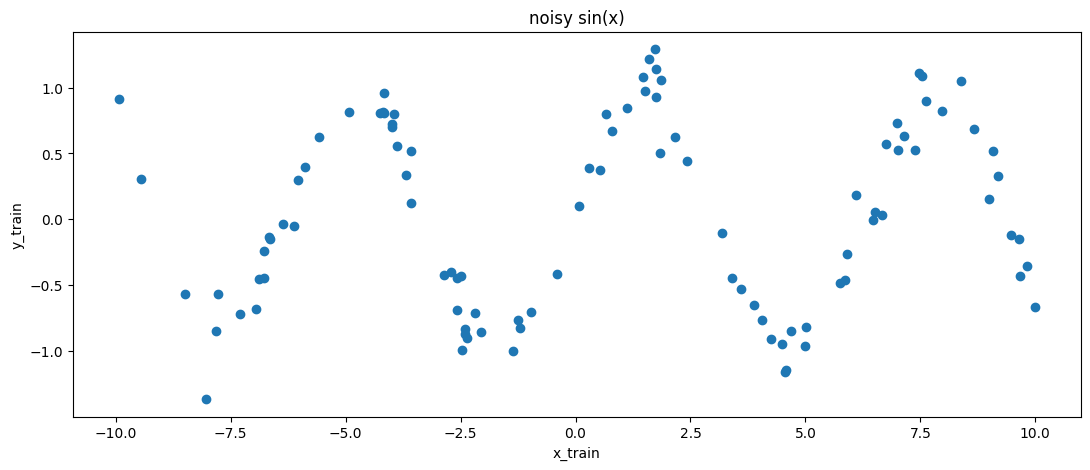

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [ ]:
x_train.unsqueeze_(1) # приведение данных к одной размерности, вектор x-строчку превратить в столбец у которого в каждой строчке будет одно число x (если стоит нижнее подчёркивание после названия функции, то функция применяется сразу к объекту)
y_train.unsqueeze_(1) # приведение данных к одной размерности, вектор y-строчку превратить в столбец у которого в каждой строчке будет одно число y (если стоит нижнее подчёркивание после названия функции, то функция применяется сразу к объекту)

tensor([[-0.6918],
        [-0.4033],
        [ 0.3739],
        [ 0.4442],
        [-0.8228],
        [-0.8513],
        [-0.6681],
        [-0.9648],
        [-1.1629],
        [ 0.5679],
        [-1.3662],
        [ 0.8111],
        [-0.4274],
        [ 0.9708],
        [ 0.9618],
        [-0.3589],
        [-0.6487],
        [ 0.7194],
        [-0.8744],
        [ 0.5223],
        [-0.9090],
        [ 0.5550],
        [ 0.8082],
        [ 0.6695],
        [ 0.5162],
        [ 0.8957],
        [-0.9444],
        [-0.0497],
        [ 0.9141],
        [-0.0087],
        [ 0.3252],
        [ 0.1829],
        [-0.0354],
        [-0.4822],
        [ 0.3372],
        [-1.0023],
        [-0.8579],
        [ 0.6269],
        [-0.6853],
        [-0.4583],
        [-0.1534],
        [ 0.8056],
        [ 0.7958],
        [-0.7666],
        [ 0.5241],
        [ 0.7319],
        [ 1.2149],
        [ 0.7030],
        [-0.2394],
        [-0.4287],
        [ 0.0342],
        [-0.5330],
        [ 0.

In [ ]:
tmp = torch.Tensor([1, 2, 3])
print(tmp)
print(tmp.unsqueeze_(1)) # пример как работает unsqueeze

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


**Validation dataset**

Text(0, 0.5, 'y_validation')

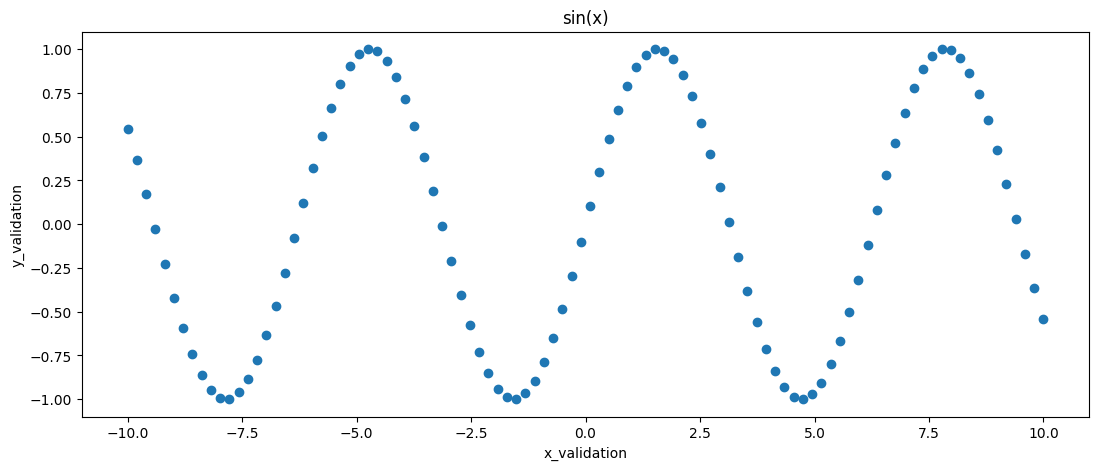

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

**Model construction**

In [ ]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
sine_net = SineNet(50)

**Prediction**

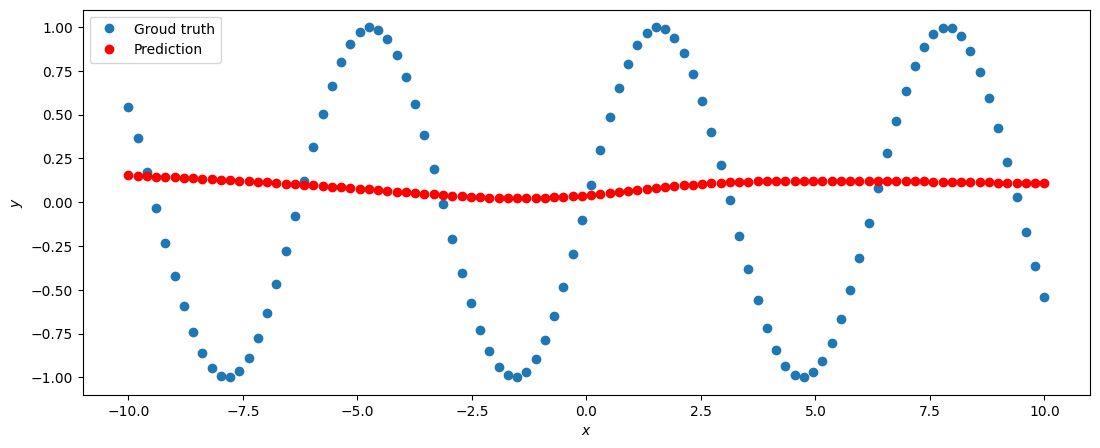

In [ ]:
def predict(net, x, y):
  y_pred = net.forward(x)
  plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
  plt.legend(loc='upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

**Optimizer**

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

**Loss function**

In [ ]:
def loss(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

**Training procedure**

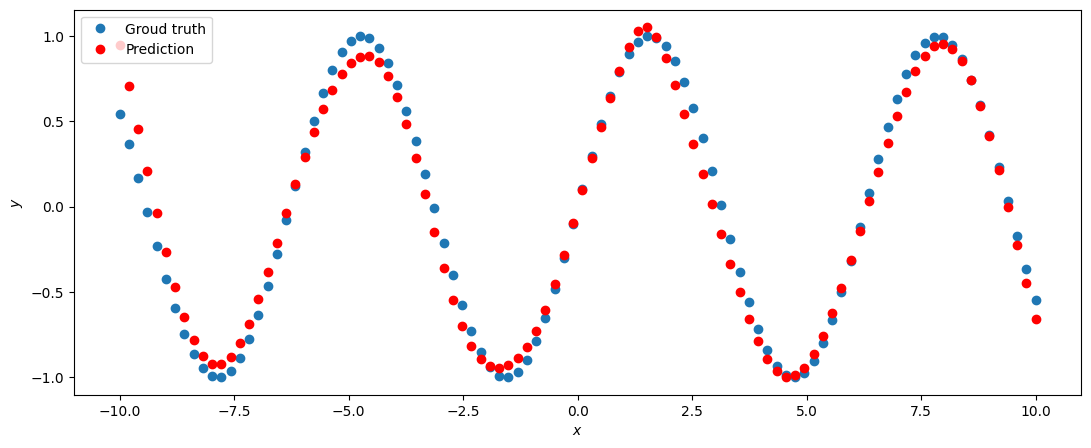

In [ ]:
for epoch_index in range(2000):
  optimizer.zero_grad()

  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

predict(sine_net, x_validation, y_validation)

# Последняя задача семинара

0.023595402017235756


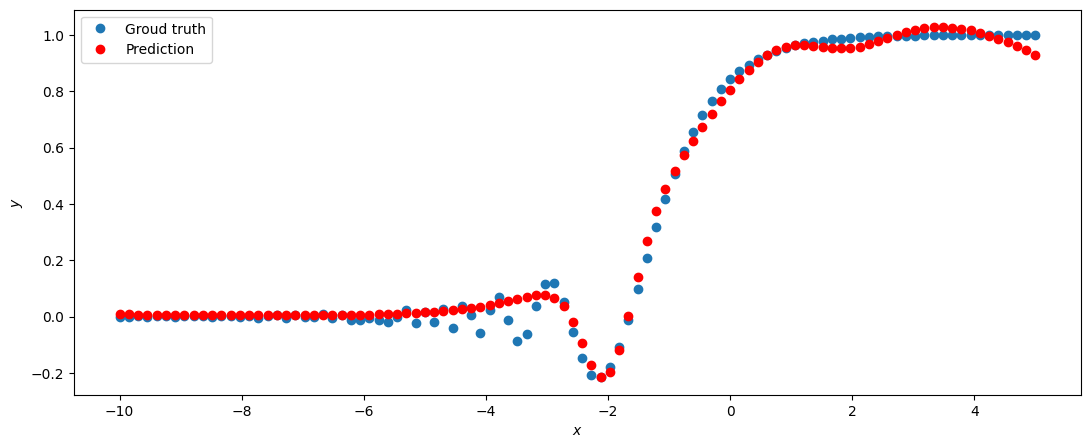

In [ ]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
      super(RegressionNet, self).__init__()
      self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
      self.act1 = torch.nn.Tanh()
      self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
      x = self.fc1(x)
      x = self.act1(x)
      x = self.fc2(x)
      return x

net = RegressionNet(25)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    abses = abs(pred - target)
    return abses.mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

# Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()
#
print(metric(net.forward(x_validation), y_validation).item())
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()


predict(net, x_validation, y_validation)

# Семинар: классификация в PyTorch

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2],
    wine.target,
    test_size = 0.3,
    shuffle = True)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(WineNet, self).__init__()

    self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
    self.activ1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.activ2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.sm = torch.nn.Softmax(dim = 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.activ1(x)
    x = self.fc2(x)
    x = self.activ2(x)
    x = self.fc3(x)
    return x
  def inference(self, x):
    x = self.forward(x)
    x = self.sm(x)
    return x

wine_net = WineNet(5)

In [ ]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wine_net.parameters(), lr = 1.0e-3)


In [ ]:
np.random.permutation(5)

array([2, 0, 1, 4, 3])

In [ ]:
batch_size = 10

for epoch in range(10000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    x_batch = X_train[batch_indexes]
    y_batch = y_train[batch_indexes]

    preds = wine_net.forward(x_batch)

    loss_val = loss(preds, y_batch)
    loss_val.backward()

    optimizer.step()

  if epoch % 100 == 0:
    test_preds = wine_net.forward(X_test)
    test_preds = test_preds.argmax(dim=1)
    print((test_preds == y_test).float().mean())

tensor(0.4074)
tensor(0.4074)
tensor(0.4630)
tensor(0.5000)
tensor(0.5000)
tensor(0.3889)
tensor(0.5000)
tensor(0.4815)
tensor(0.4815)
tensor(0.4074)
tensor(0.4630)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.7222)
tensor(0.6296)
tensor(0.6852)
tensor(0.6852)
tensor(0.6852)
tensor(0.6852)
tensor(0.6852)
tensor(0.7037)
tensor(0.7222)
tensor(0.7222)
tensor(0.7407)
tensor(0.7593)
tensor(0.7593)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
<ipython-input-34-0be2941ba013>:23: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  plt.scatter(X_train[indexes, 0],
<ipython-input-34-0be2941ba013>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[indexes, 0],


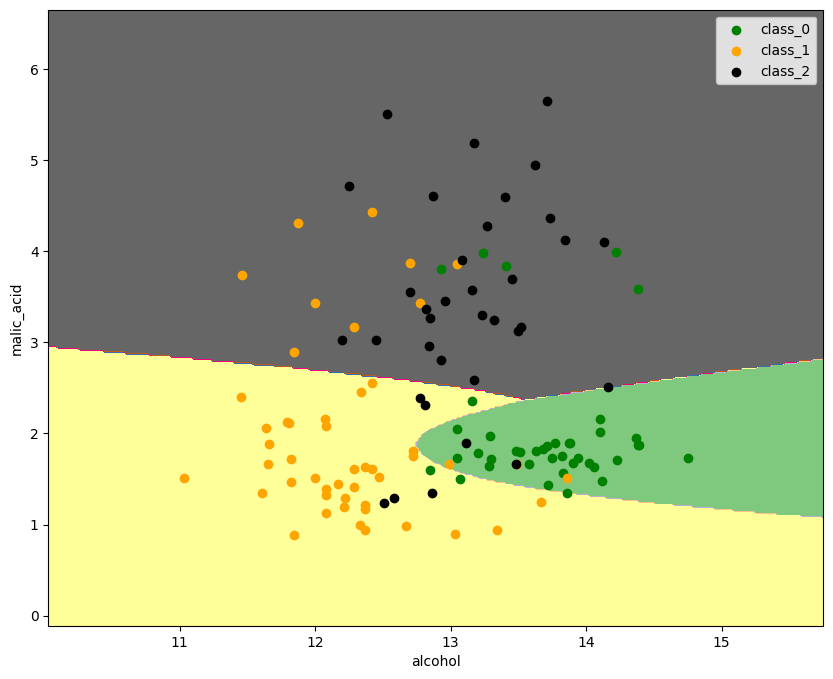

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = torch.meshgrid(torch.arange(x_min, x_max, plot_step), torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
  indexes = np.where(y_train == i)
  plt.scatter(X_train[indexes, 0],
              X_train[indexes, 1],
              c=color,
              label=wine.target_names[i],
              cmap="Accent")
  plt.xlabel(wine.feature_names[0])
  plt.ylabel(wine.feature_names[1])
  plt.legend()

# Семинар: Классификация рукописных чисел полносвязанной сетью

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 192461433.12it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 83484282.44it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 68430133.05it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13568752.68it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

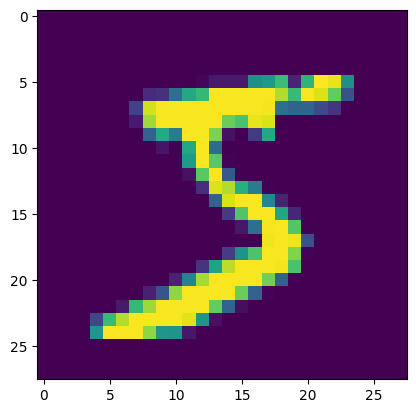

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
    self.ac1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.ac1(x)
    x = self.fc2(x)
    return x

mnist_net = MNISTNet(100)

In [ ]:
torch.cuda.is_available()

False

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
         [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
         [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
         ...,
         [ 0.0221,  0.0258, -0.0088,  ..., -0.0141,  0.0051, -0.0318],
         [-0.0217, -0.0136,  0.0185,  ..., -0.0012, -0.0012, -0.0017],
         [ 0.0142,  0.0089, -0.0053,  ...,  0.0311, -0.0181,  0.0020]],
        requires_grad=True),
 Parameter containing:
 tensor([-3.5402e-02,  1.8178e-02, -2.1709e-02, -1.1839e-02,  4.8722e-03,
         -1.0492e-02, -1.9008e-02,  2.6994e-02, -3.4899e-02,  1.0381e-02,
         -3.5228e-02, -5.6381e-03, -2.0134e-02, -3.0264e-02, -1.3289e-02,
          2.5346e-02, -1.0797e-02,  2.1568e-03,  4.3630e-03, -2.1916e-02,
          2.2670e-02, -1.5766e-02,  3.4906e-02, -2.3063e-02, -6.8216e-03,
          2.7051e-02, -1.3991e-02,  9.7218e-03, -9.9075e-04,  1.6625e-03,
          2.3455e-02, -2.5294e-02,  4.80

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
  order = np.random.permutation(len(X_train))

  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    preds = mnist_net.forward(X_batch)

    loss_value = loss(preds, y_batch)
    loss_value.backward()

    optimizer.step()

  test_preds = mnist_net.forward(X_test)
  test_loss_history.append(loss(test_preds, y_test))

  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
  test_accuracy_history.append(accuracy)
  print(accuracy)

tensor(0.9091)
tensor(0.9176)
tensor(0.9197)
tensor(0.9212)
tensor(0.9271)
tensor(0.9299)
tensor(0.9263)
tensor(0.9299)
tensor(0.9324)
tensor(0.9330)
tensor(0.9296)
tensor(0.9330)
tensor(0.9311)
tensor(0.9371)
tensor(0.9405)
tensor(0.9424)
tensor(0.9365)
tensor(0.9340)
tensor(0.9370)
tensor(0.9396)
tensor(0.9370)
tensor(0.9325)
tensor(0.9378)
tensor(0.9418)
tensor(0.9404)


KeyboardInterrupt: 

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

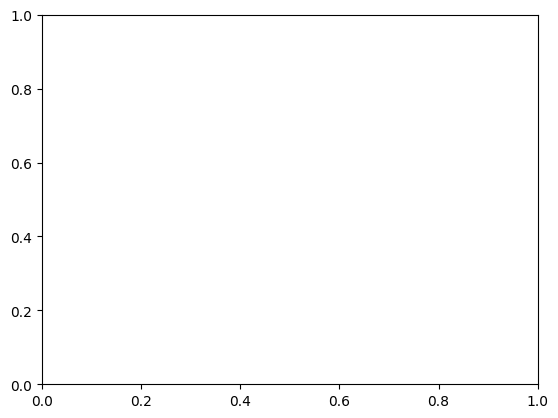

In [ ]:
# plt.plot(test_accuracy_history)
# plt.plot(test_loss_history)

# Задача 1 из семинара

In [ ]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)

# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
fc_out_alternative =  x @ torch.t(w) + b

# Проверка осуществляется автоматически вызовом функции
print(fc_out == fc_out_alternative)

tensor([[True, True, True]])


# Задача 2 из семинара

In [ ]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)
# Просуммируем выход fc-слоя, чтобы получить скаляр:
fc_out_summed = fc_out.sum()

# Посчитаем градиенты формулы fc_out_summed:
fc_out_summed.backward()
weight_grad = fc.weight.grad
bias_grad = fc.bias.grad

# Ok, теперь воспроизведем вычисления выше но без fc-слоя:
# Проставим, что у "w" и "b" нужно вычислять градиенты (для fc-слоя это произошло автоматически):
w.requires_grad_(True)
b.requires_grad_(True)

# Получим выход нашей формулы:
our_formula = (x @ torch.t(w) + b).sum()

# Сделайте backward для нашей формулы:
our_formula.backward()

# Проверка осуществляется автоматически, вызовом функций:
print('fc_weight_grad:', weight_grad)
print('our_weight_grad:', w.grad)
print('fc_bias_grad:', bias_grad)
print('out_bias_grad:', b.grad)

fc_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
our_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
fc_bias_grad: tensor([[1., 1., 1.]])
out_bias_grad: tensor([[1., 1., 1.]])
